In [1]:
# Loading all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS



In [2]:
# Loading the dataset
df = pd.read_csv('Facebook.csv')


In [3]:
# checking weather data load without error
print(df.head(2))   


   platform user_name  talent_name  \
0  Facebook   foxsoul          NaN   
1  Facebook   foxsoul          NaN   

                                         post_url           post_id  \
0  www.facebook.com/foxsoul/posts/839436070799829  '839436070799829   
1  www.facebook.com/foxsoul/posts/838229594253810  '838229594253810   

                                   post_caption_text     post_type  \
0  The Queens are talking about Ray J going after...  native_video   
1  Claudia, Al, and Funky are talking about 50 Ce...  native_video   

  date_published  post_likes_count  post_comments_count  ...  \
0      9/13/2022              2926                  834  ...   
1      9/11/2022              1299                  425  ...   

   post_engagements_count  property  author_type  media_classification  \
0                    5186  Fox Soul    Show Page                 Owned   
1                    2419  Fox Soul    Show Page                 Owned   

   date_of_week_ending_in  lifetime_post_tot

In [5]:
# Converting caption text to upper case
print(df['post_caption_text'].str.upper().head())


0    THE QUEENS ARE TALKING ABOUT RAY J GOING AFTER...
1    CLAUDIA, AL, AND FUNKY ARE TALKING ABOUT 50 CE...
2    CLAUDIA, AL, AND FUNKY ARE TALKING ABOUT NICKI...
3    THE QUEENS ARE TALKING ABOUT NICKI MINAJ GOING...
4    CLAUDIA, AL, AND FUNKY ARE TALKING ABOUT TOKYO...
Name: post_caption_text, dtype: object


In [6]:
# Printing the first caption
print(df['post_caption_text'][0])


The Queens are talking about Ray J going after Kris Jenner for her alleged lies on the James Cordon show Thoughts Soulmates Make sure you tune in to Cocktails with Queens every Monday at 8pm ET, only on FOX SOUL


In [9]:
# Applying regex on text data and transforming it
df['text_new'] = ''
for i in range(len(df['post_caption_text'])):
    m = re.search('(?<=:)(.*)', df['post_caption_text'][i])
    try:
        df['text_new'][i]=m.group(0)
    except AttributeError:
        df['text_new'][i]=df['post_caption_text'][i]
        
print(df['text_new'])


0     The Queens are talking about Ray J going after...
1     Claudia, Al, and Funky are talking about 50 Ce...
2     Claudia, Al, and Funky are talking about Nicki...
3     The Queens are talking about Nicki Minaj going...
4     Claudia, Al, and Funky are talking about Tokyo...
5     The Queens are talking about Ne-Yo and his div...
6     The Queens are joined by the queen of dancehal...
7     Claudia, Al, and Funky are talking about a Pop...
8     Claudia, Al, and Funky are talking about a mot...
9      https://wwwfoxsoultv/ Download the FOX SOUL a...
10    The Queens are talking about Halle Bailey bein...
11    Claudia, Al, and Funky are talking about Nicki...
12    Claudia, Al, and Funky are talking about Shery...
13    Claudia, Al, and Funky are talking about PnB R...
14    Claudia, Al, and Funky are talking about Tokyo...
15    Fox Soul host, Claudia Jordan showed up to New...
16    Bill is joined by actress, host, producer, and...
17    You never know what kind of exclusives the

d:\WordCloud\wordcloud\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\WordCloud\wordcloud\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
def wordcloud_by_province(dataset):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",
                          stopwords=stopwords,
                          random_state = 2016).generate(" ".join([i for i in dataset['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("timepass")


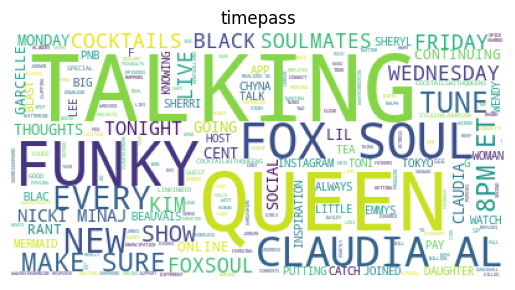

In [11]:
wordcloud_by_province(df)  

In [13]:
data = pd.read_csv('testing.csv')
data

,screen_name,text,favorite_count,retweet_count,url,id,Date,friends_count,followers_count,Post_Flag,Tweet_Flag,mediatype,Show,total_engagements,Author Type,Final Tagging,image_url,spend_level,subproperty
0,foxsoultv,You never know what kind of exclusives the #Qu...,2,1,www.twitter.com/foxsoultv/status/1569381831648...,'1569381831648198660,9/12/2022 0:00,NaN,NaN,Post,Main,video,Fox Soul,3,Show Page,Owned,http://pbs.twimg.com/ext_tw_video_thumb/156938...,NaN,NaN
1,Kiwes,FOX SOUL LIVE: Cocktails With Queens Portia m...,0,1,www.twitter.com/Kiwes/status/1569325345836515328,'1569325345836515328,9/12/2022 0:00,NaN,NaN,Post,Main,NaN,Fox Soul,1,NaN,Organic,NaN,NaN,NaN


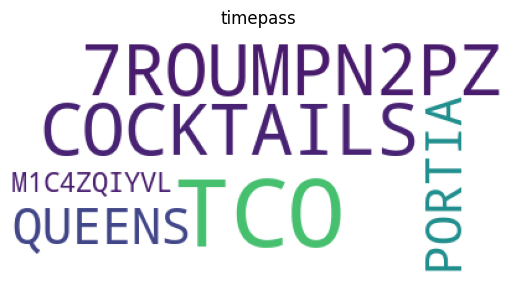

In [20]:
wordcloud_by_province(data)  